# Importing libraries and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("survey.csv")

In [ ]:
df.shape

(1259, 27)

# Data Cleaning

In [ ]:
pd.set_option('display.max_columns', None)
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [ ]:
df.isna()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1255,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1256,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1257,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
df.isna().mean()

Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.014297
family_history               0.000000
treatment                    0.000000
work_interfere               0.209690
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
comments    

In [ ]:
df = df.drop(["Timestamp","state","comments"], axis=1).copy()

In [ ]:
df.shape

(1259, 24)

In [ ]:
df.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
df["self_employed"].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
df["self_employed"].mode()

0    No
Name: self_employed, dtype: object

In [ ]:
df["self_employed"] = df["self_employed"].fillna("No")

In [ ]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
df["work_interfere"] = df["work_interfere"].fillna("Unknown")

In [ ]:
df.head(10)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,No,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,M,Canada,No,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,Canada,No,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [ ]:
df.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [ ]:
df.loc[df["Age"] < 18, "Age"] = 18
df.loc[df["Age"] > 75, "Age"] = 75

In [ ]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 75, 55,
       48, 20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [ ]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
#For male genders
df["Gender"].replace(["Male","M","male","m","Male-ish","maile","Cis Male","Mal", "Male (CIS)", "Make", "Male ", "Man", "msle", "Mail", "cis male", "Malr", "Cis Man"], "Male", inplace = True)


In [ ]:
df["Gender"].unique()

array(['Female', 'Male', 'female', 'Trans-female', 'Cis Female', 'F',
       'something kinda male?', 'Woman', 'f', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Trans woman', 'Neuter', 'Female (trans)', 'queer', 'Female (cis)',
       'A little about you', 'p', 'femail',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
df["Gender"].replace(["Female", "female", "Cis Female","F","Woman","f","Femake","woman","Female ","cis-female/femme","Female (cis)","femail"],"Female", inplace = True)

In [ ]:
df["Gender"].unique()

array(['Female', 'Male', 'Trans-female', 'something kinda male?',
       'queer/she/they', 'non-binary', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer', 'A little about you', 'p',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
df["Gender"].replace(["Trans-female", "something kinda male?","queer/she/they", "non-binary", "Nah", "All", "Enby", "fluid","Genderqueer", "Androgyne", "Agender", "Guy (-ish) ^_^", "male leaning androgynous", "Trans woman", "Neuter","Female (trans)", "queer", "A little about you", "p","ostensibly male, unsure what that really means"], "Other", inplace = True)

In [ ]:
df["Gender"].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [ ]:
df.shape

(1259, 24)

# Data Visualization

In [ ]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

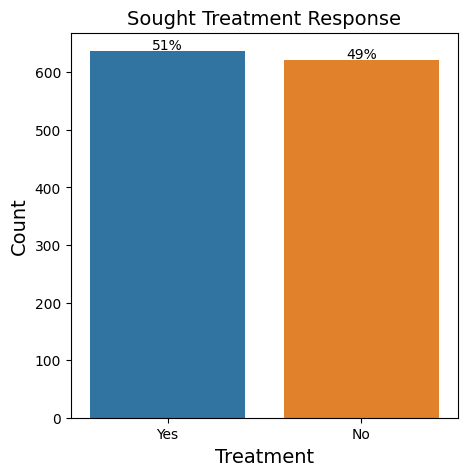

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Sought Treatment Response', fontsize=14)
plot = sb.countplot(x="treatment", data=df)
plt.xlabel("Treatment",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

Text(0.5, 1.0, 'Gender Distribution')

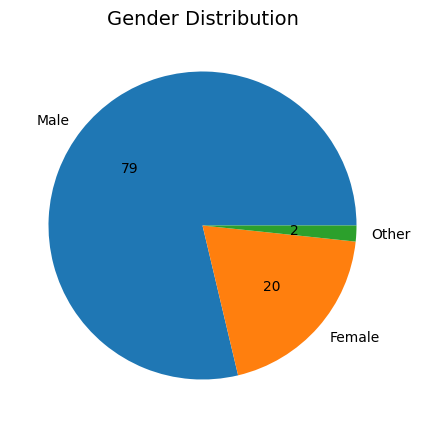

In [ ]:
plt.figure(figsize=(5,5))
genders_count = df["Gender"].value_counts()
plt.pie(genders_count, labels=genders_count.index,autopct="%0.f")
plt.title('Gender Distribution', fontsize=14)

<Axes: title={'center': 'Countries'}, xlabel='Country', ylabel='count'>

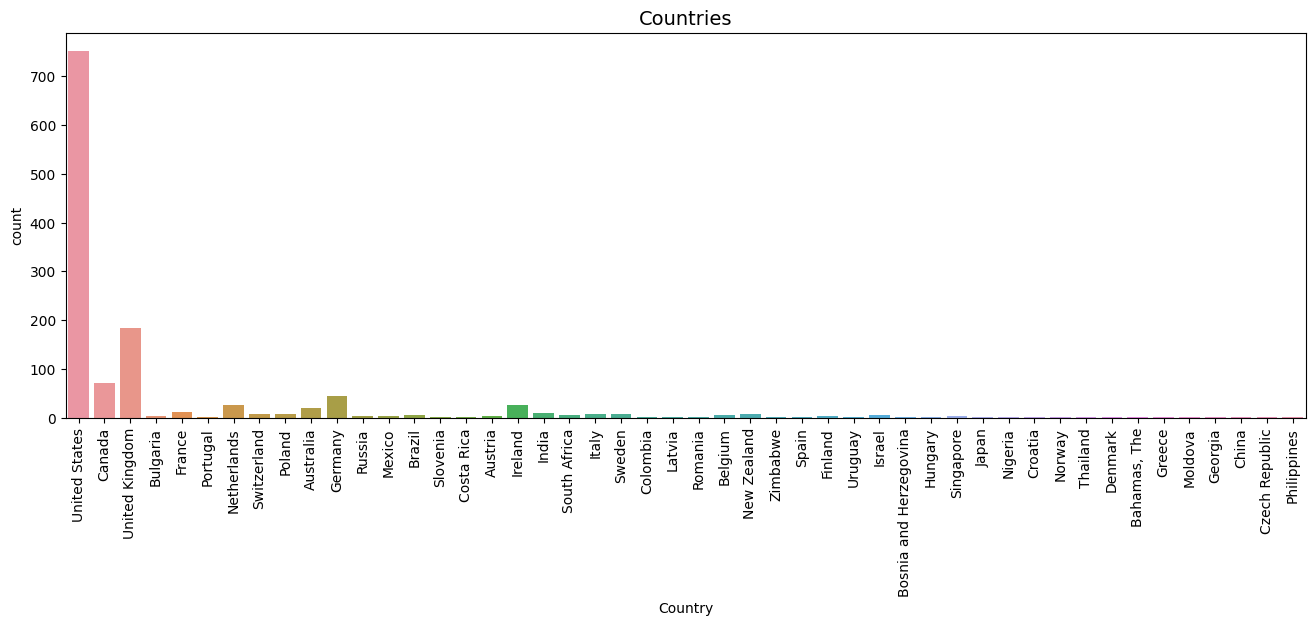

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Countries', fontsize=14)
plt.xticks(rotation=90)
sb.countplot(x="Country", data=df)

Text(0, 0.5, 'Count')

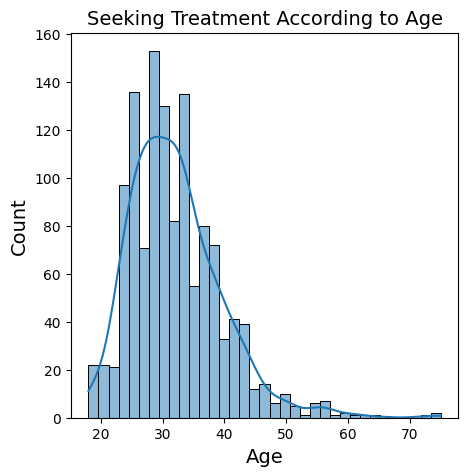

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Seeking Treatment According to Age', fontsize=14)
sb.histplot(x="Age", data=df, kde="treatment")
plt.xlabel("Age",fontsize=14)
plt.ylabel("Count",fontsize=14)

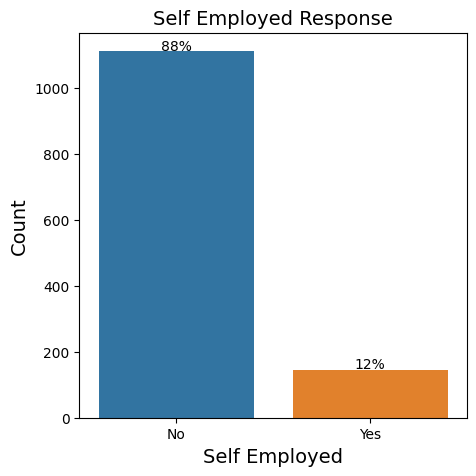

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Self Employed Response', fontsize=14)
plot = sb.countplot(x="self_employed", data=df)
plt.xlabel("Self Employed",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

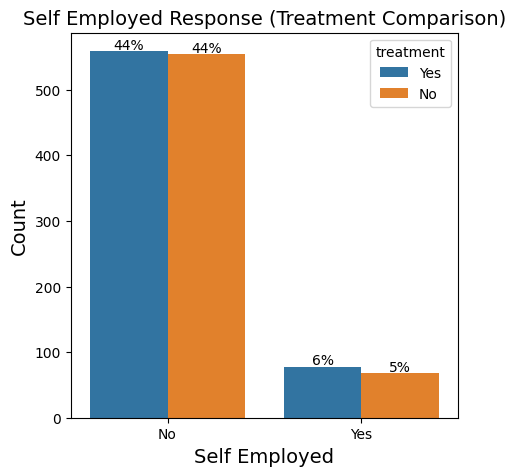

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Self Employed Response (Treatment Comparison)', fontsize=14)
plot = sb.countplot(x="self_employed", data=df, hue = df["treatment"])
plt.xlabel("Self Employed",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

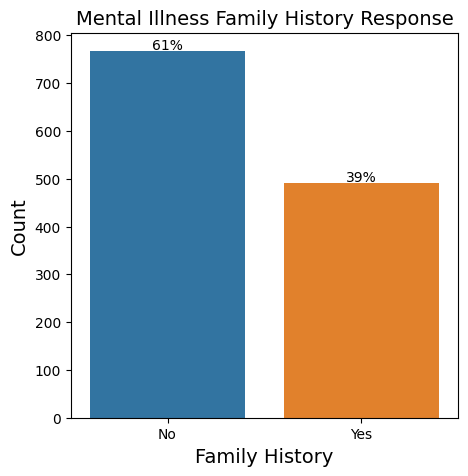

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Mental Illness Family History Response', fontsize=14)
plot = sb.countplot(x="family_history", data=df)
plt.xlabel("Family History",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

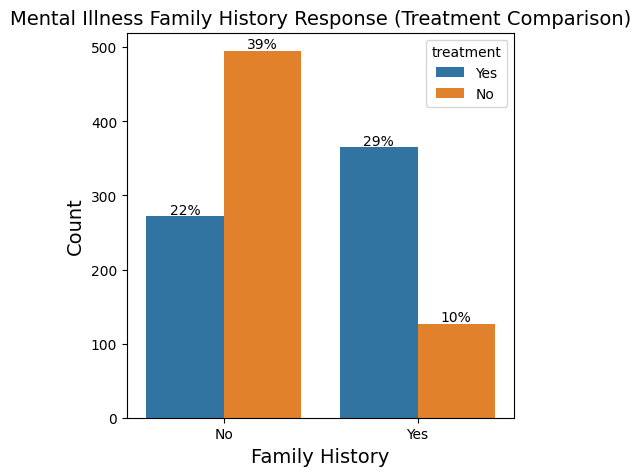

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Mental Illness Family History Response (Treatment Comparison)', fontsize=14)
plot = sb.countplot(x="family_history", data=df, hue = df["treatment"])
plt.xlabel("Family History",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

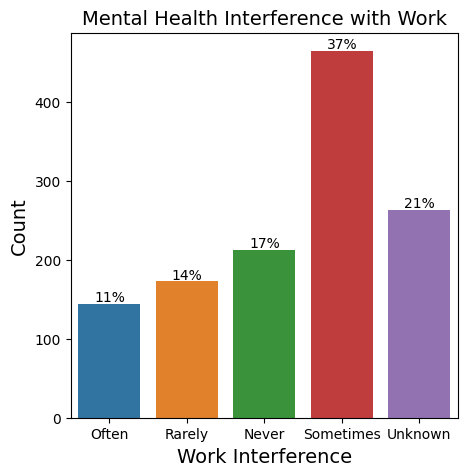

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Mental Health Interference with Work', fontsize=14)
plot = sb.countplot(x="work_interfere", data=df)
plt.xlabel("Work Interference",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

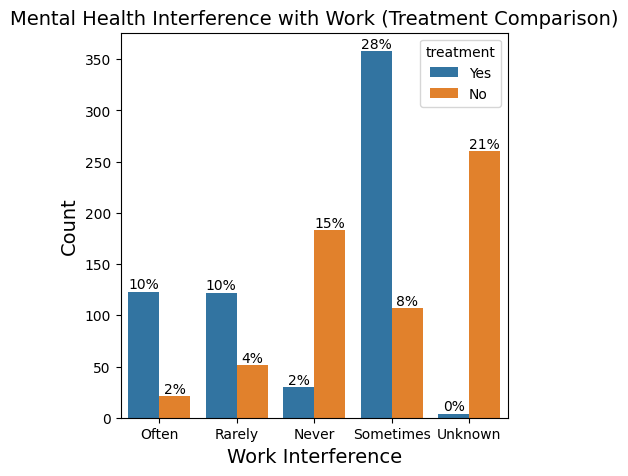

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Mental Health Interference with Work (Treatment Comparison)', fontsize=14)
plot = sb.countplot(x="work_interfere", data=df, hue="treatment")
plt.xlabel("Work Interference",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

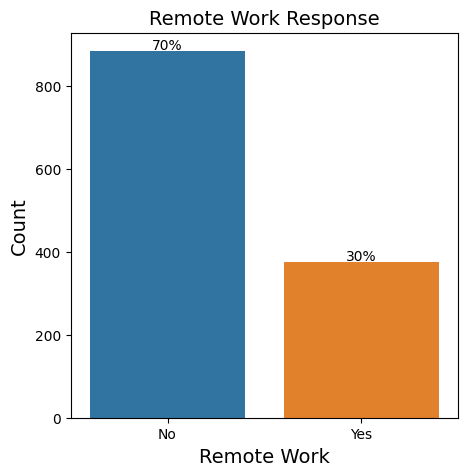

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Remote Work Response', fontsize=14)
plot = sb.countplot(x="remote_work", data=df)
plt.xlabel("Remote Work",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

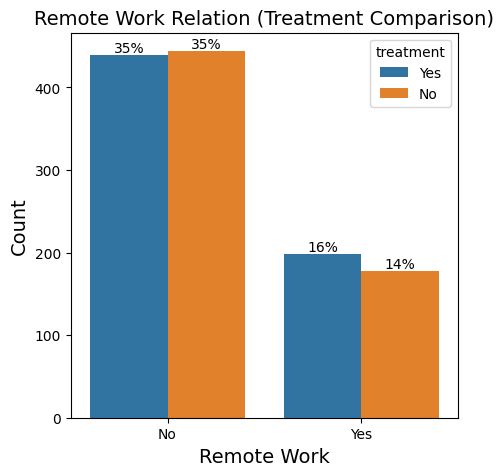

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Remote Work Relation (Treatment Comparison)', fontsize=14)
plot = sb.countplot(x="remote_work", data=df, hue="treatment")
plt.xlabel("Remote Work",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

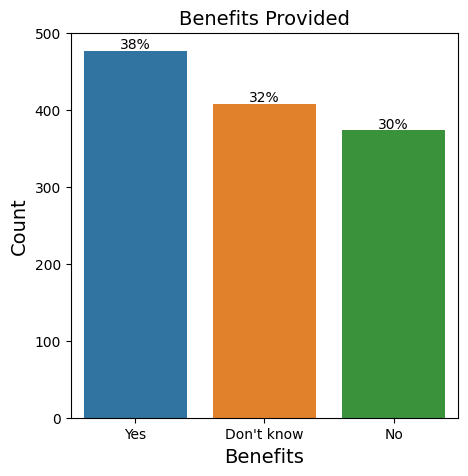

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Benefits Provided', fontsize=14)
plot = sb.countplot(x="benefits", data=df)
plt.xlabel("Benefits",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

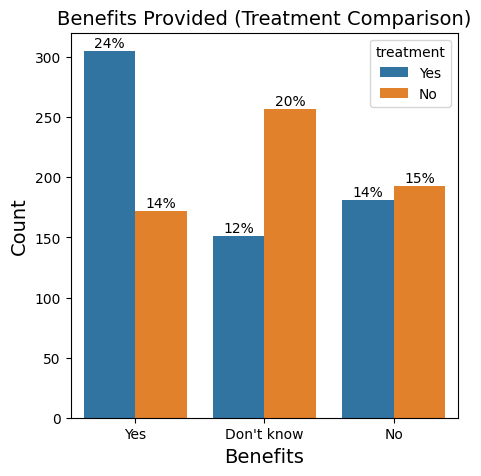

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Benefits Provided (Treatment Comparison)', fontsize=14)
plot = sb.countplot(x="benefits", data=df, hue="treatment")
plt.xlabel("Benefits",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

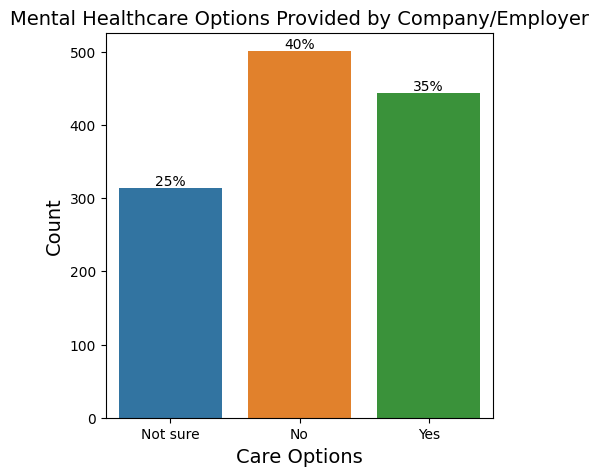

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Mental Healthcare Options Provided by Company/Employer', fontsize=14)
plot = sb.countplot(x="care_options", data=df)
plt.xlabel("Care Options",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

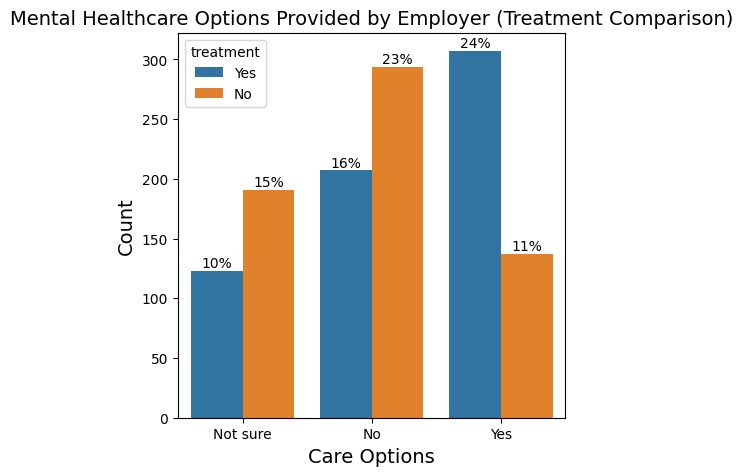

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Mental Healthcare Options Provided by Employer (Treatment Comparison)', fontsize=14)
plot = sb.countplot(x="care_options", data=df, hue="treatment")
plt.xlabel("Care Options",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

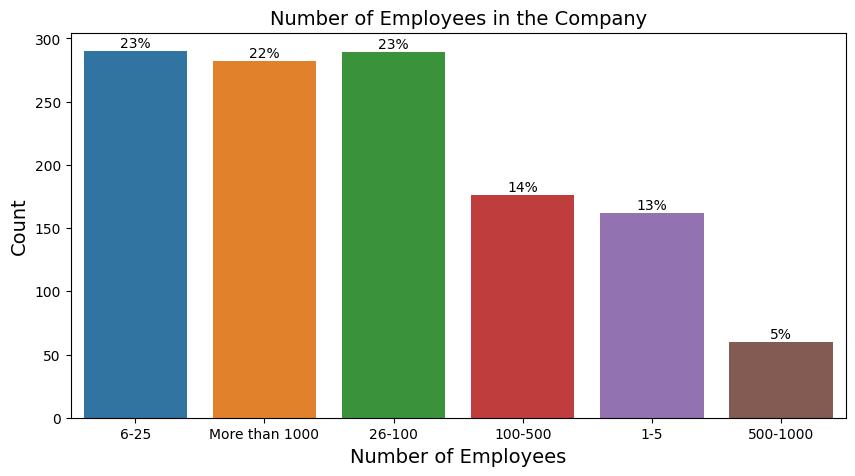

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Number of Employees in the Company', fontsize=14)
plot = sb.countplot(x="no_employees", data=df)
plt.xlabel("Number of Employees",fontsize=14)
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

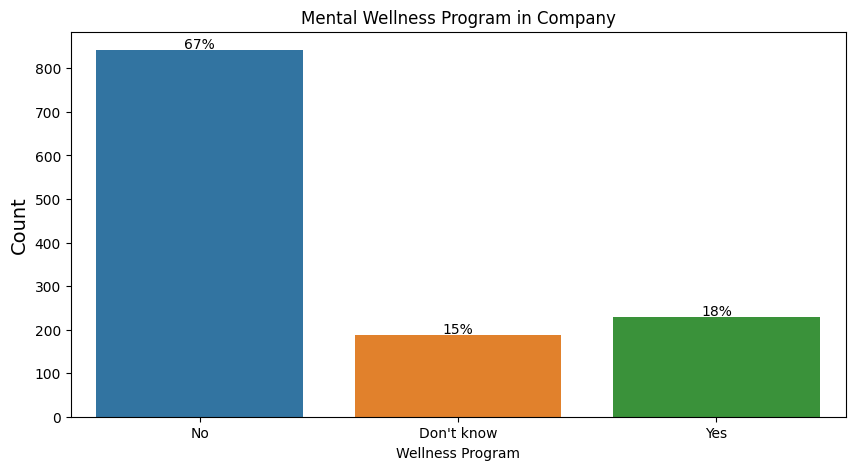

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Mental Wellness Program in Company')
plot = sb.countplot(x="wellness_program",data=df)
plt.xlabel("Wellness Program")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

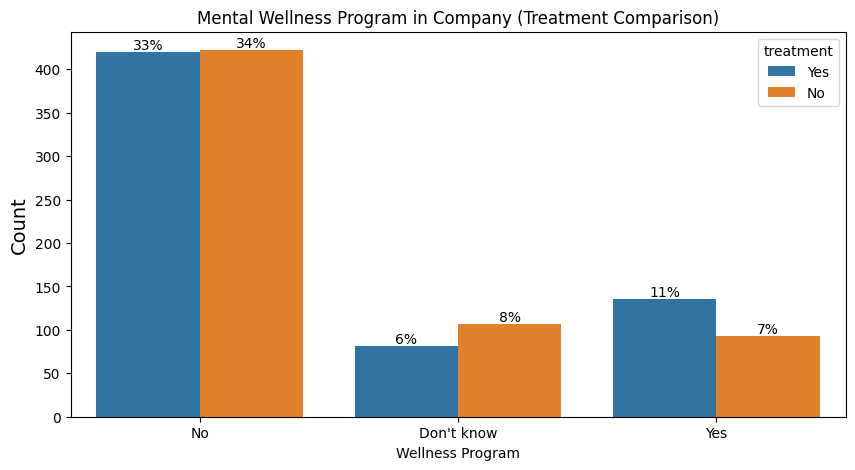

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Mental Wellness Program in Company (Treatment Comparison)')
plot = sb.countplot(x="wellness_program",data=df, hue="treatment")
plt.xlabel("Wellness Program")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

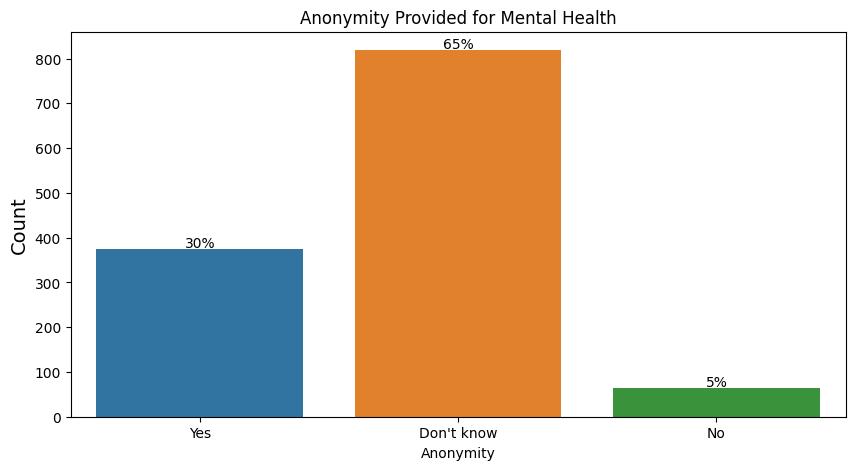

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Anonymity Provided for Mental Health')
plot = sb.countplot(x="anonymity",data=df)
plt.xlabel("Anonymity")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

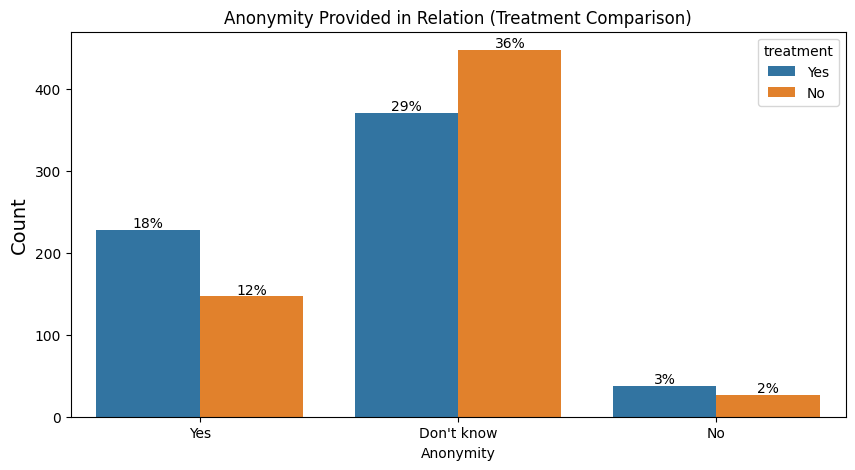

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Anonymity Provided in Relation (Treatment Comparison)')
plot = sb.countplot(x="anonymity", data=df, hue="treatment")
plt.xlabel("Anonymity")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

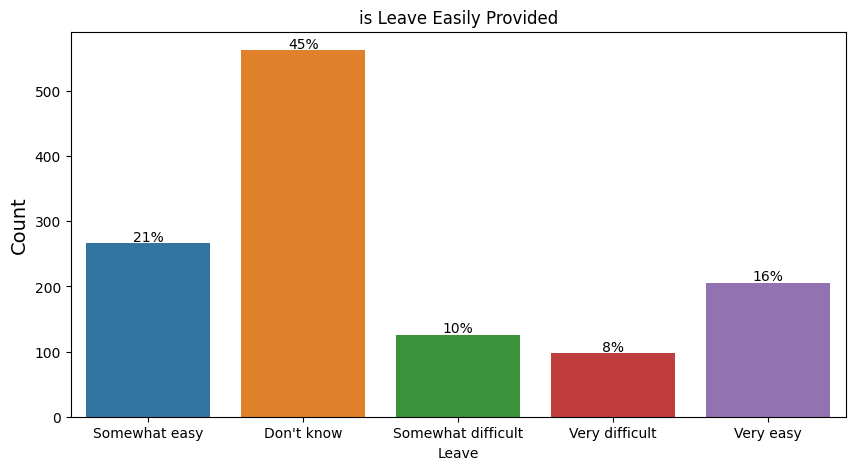

In [ ]:
plt.figure(figsize=(10,5))
plt.title('is Leave Easily Provided')
plot = sb.countplot(x="leave", data=df)
plt.xlabel("Leave")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

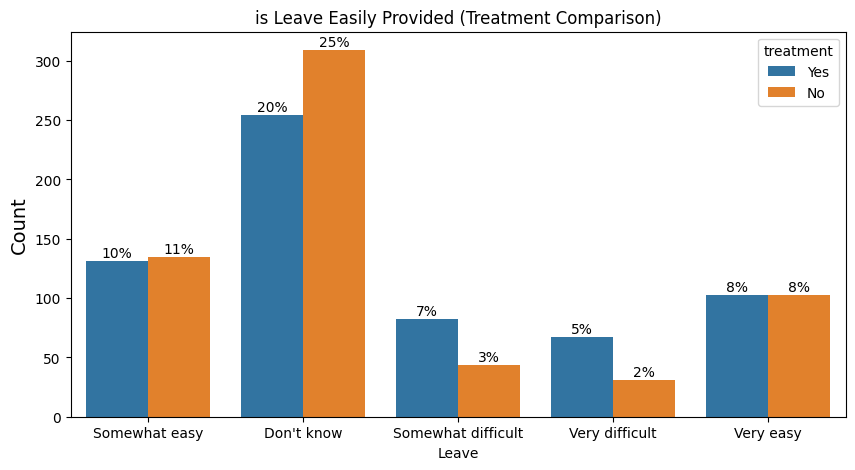

In [ ]:
plt.figure(figsize=(10,5))
plt.title('is Leave Easily Provided (Treatment Comparison)')
plot = sb.countplot(x="leave", data=df, hue="treatment")
plt.xlabel("Leave")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

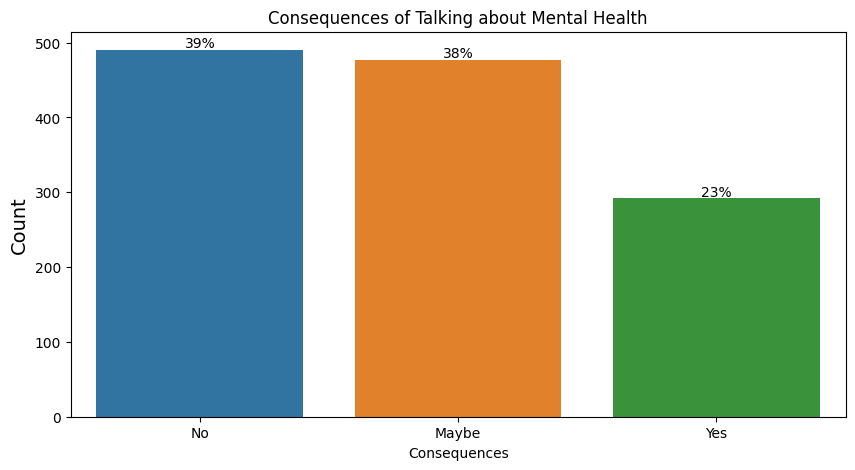

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Consequences of Talking about Mental Health')
plot = sb.countplot(x="mental_health_consequence", data=df)
plt.xlabel("Consequences")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

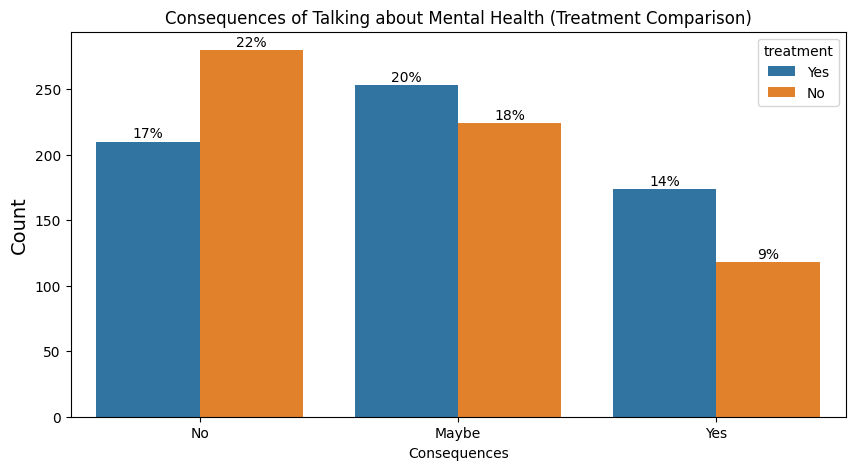

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Consequences of Talking about Mental Health (Treatment Comparison)')
plot = sb.countplot(x="mental_health_consequence", data=df, hue="treatment")
plt.xlabel("Consequences")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

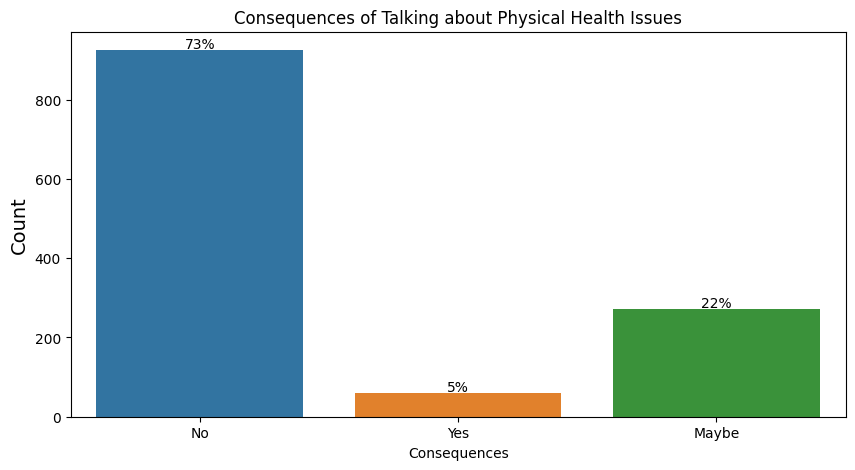

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Consequences of Talking about Physical Health Issues')
plot = sb.countplot(x="phys_health_consequence", data=df)
plt.xlabel("Consequences")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

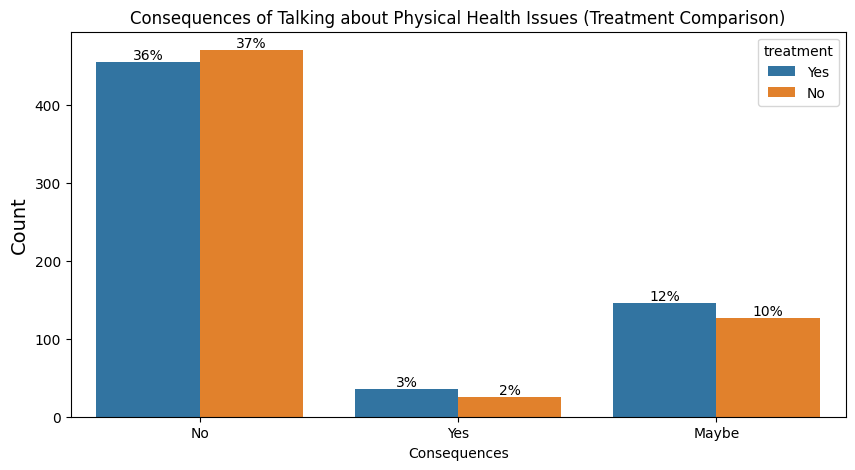

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Consequences of Talking about Physical Health Issues (Treatment Comparison)')
plot = sb.countplot(x="phys_health_consequence", data=df, hue="treatment")
plt.xlabel("Consequences")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

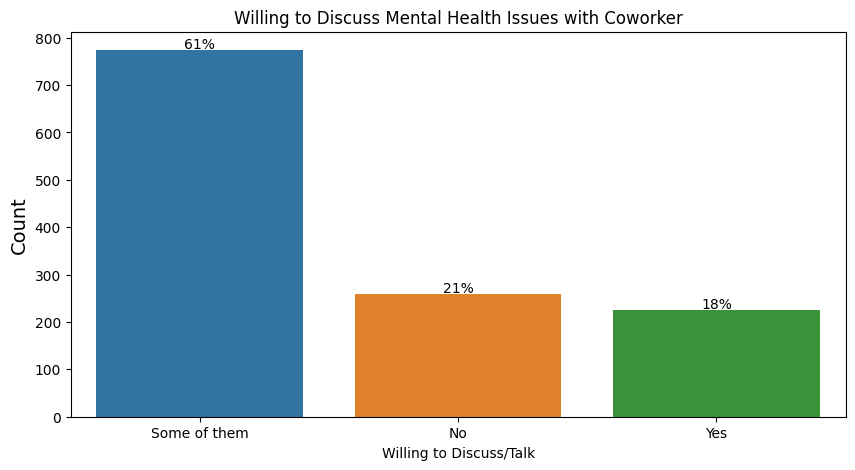

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Willing to Discuss Mental Health Issues with Coworker')
plot = sb.countplot(x="coworkers", data=df)
plt.xlabel("Willing to Discuss/Talk")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

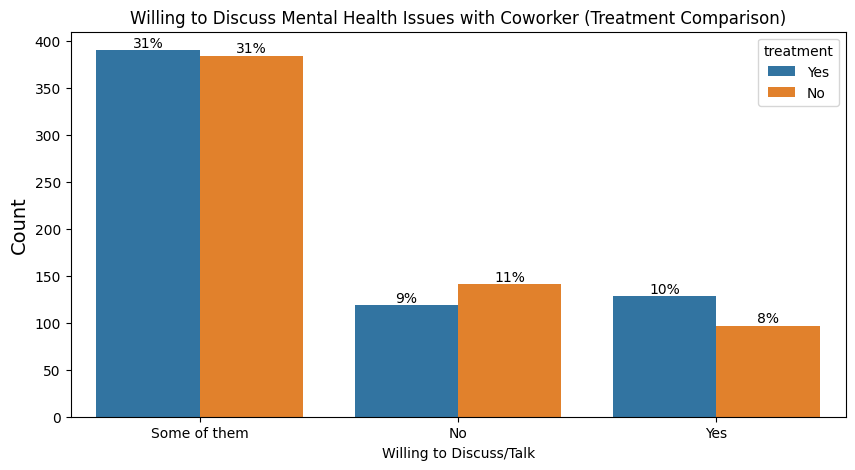

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Willing to Discuss Mental Health Issues with Coworker (Treatment Comparison)')
plot = sb.countplot(x="coworkers", data=df, hue="treatment")
plt.xlabel("Willing to Discuss/Talk")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

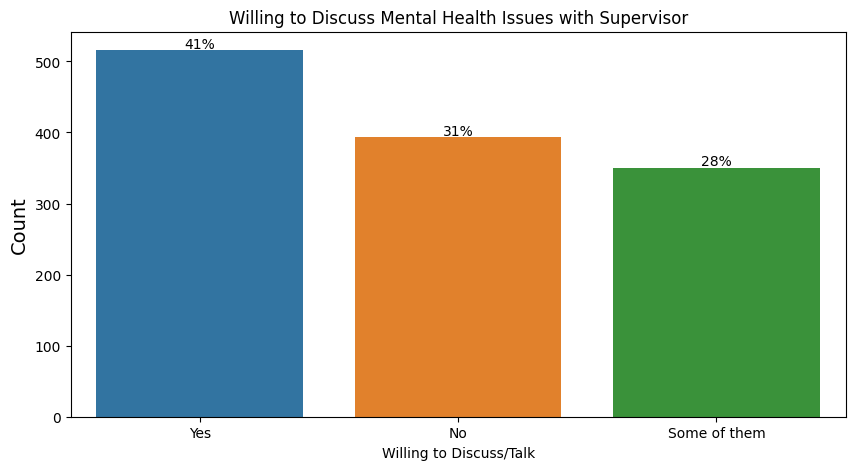

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Willing to Discuss Mental Health Issues with Supervisor')
plot = sb.countplot(x="supervisor", data=df)
plt.xlabel("Willing to Discuss/Talk")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

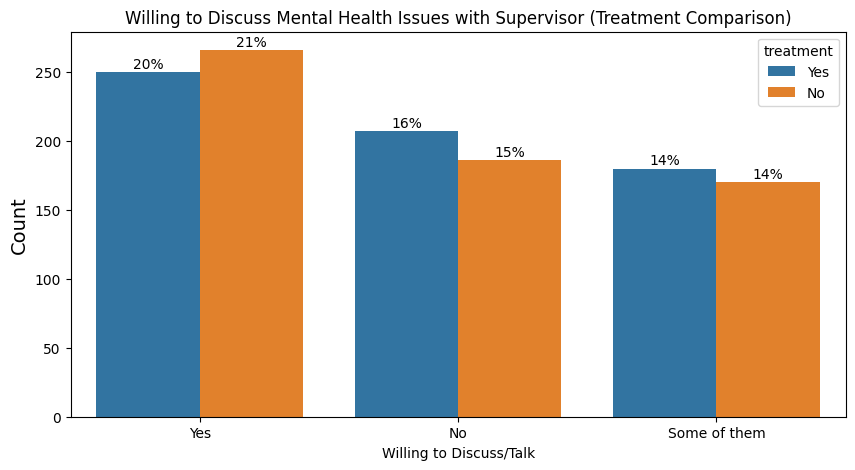

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Willing to Discuss Mental Health Issues with Supervisor (Treatment Comparison)')
plot = sb.countplot(x="supervisor", data=df, hue="treatment")
plt.xlabel("Willing to Discuss/Talk")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

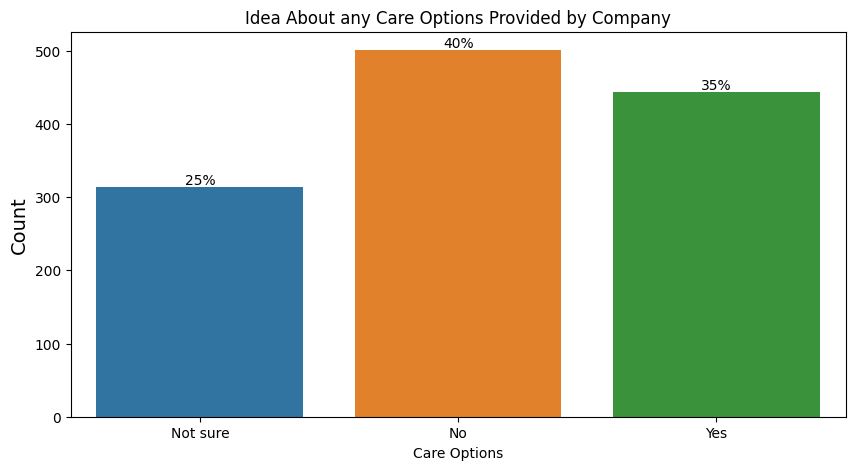

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Idea About any Care Options Provided by Company')
plot = sb.countplot(x="care_options", data=df)
plt.xlabel("Care Options")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

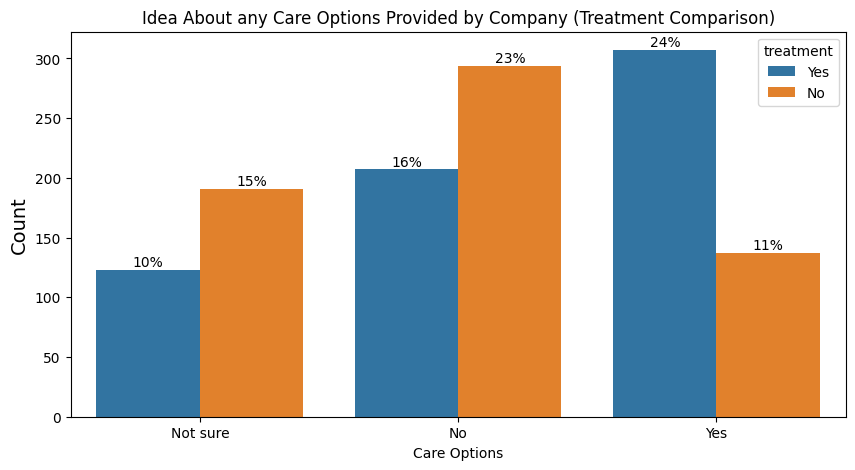

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Idea About any Care Options Provided by Company (Treatment Comparison)')
plot = sb.countplot(x="care_options", data=df, hue="treatment")
plt.xlabel("Care Options")
plt.ylabel("Count",fontsize=14)
total = len(df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 3, '{:.0f}%'.format(height/total * 100), ha="center")

plt.show()

# Model Training

In [ ]:
df.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [ ]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
#only Age column has numerical data

objectColumns = ['Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for columns in objectColumns:
  df[columns] = LabelEncoder().fit_transform(df[columns])

In [ ]:
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       181
           1       0.77      0.73      0.75       197

    accuracy                           0.75       378
   macro avg       0.75      0.75      0.75       378
weighted avg       0.75      0.75      0.75       378



<Axes: title={'center': 'Confusion Matrix of Decision Tree'}>

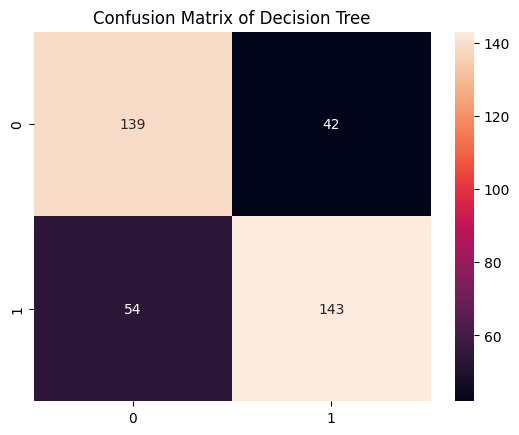

In [ ]:
#predictions
y_pred = DecisionTree.predict(X_test)

#model evaluation
report = classification_report(y_test, y_pred)
acc_DT = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Classification Report:")
print(report)

plt.title("Confusion Matrix of Decision Tree")
sb.heatmap(conf_matrix, annot=True, fmt="d")

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       181
           1       0.79      0.85      0.82       197

    accuracy                           0.80       378
   macro avg       0.80      0.80      0.80       378
weighted avg       0.80      0.80      0.80       378



<Axes: title={'center': 'Confusion Matrix of Random Forest'}>

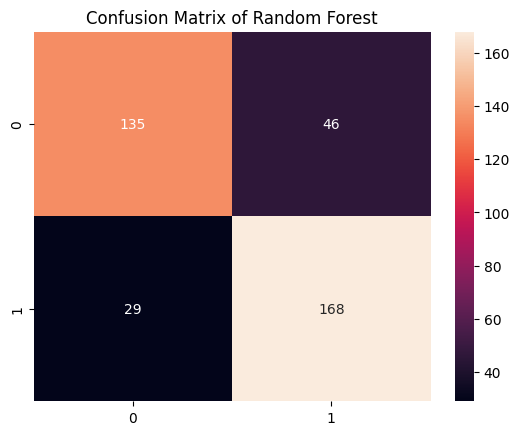

In [ ]:
#predictions
y_pred = RF.predict(X_test)

#model evaluation
report=classification_report(y_test, y_pred)
acc_RF = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Classification Report:")
print(report)

plt.title("Confusion Matrix of Random Forest")
sb.heatmap(conf_matrix, annot=True, fmt="d")

In [ ]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       181
           1       0.81      0.89      0.85       197

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



<Axes: title={'center': 'Confusion Matrix of Gradient Boost'}>

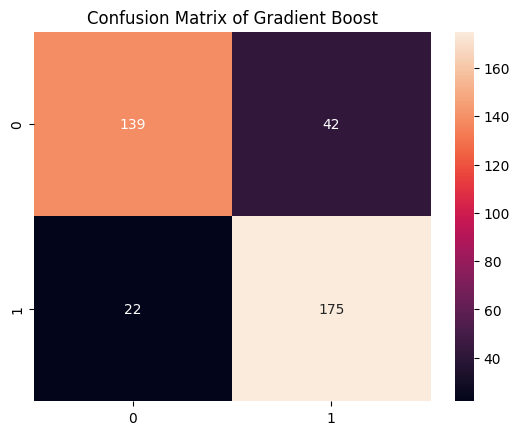

In [ ]:
#predictions
y_pred = GB.predict(X_test)

#model evaluation
report=classification_report(y_test, y_pred)
acc_GB = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Classification Report:")
print(report)

plt.title("Confusion Matrix of Gradient Boost")
sb.heatmap(conf_matrix, annot=True, fmt="d")

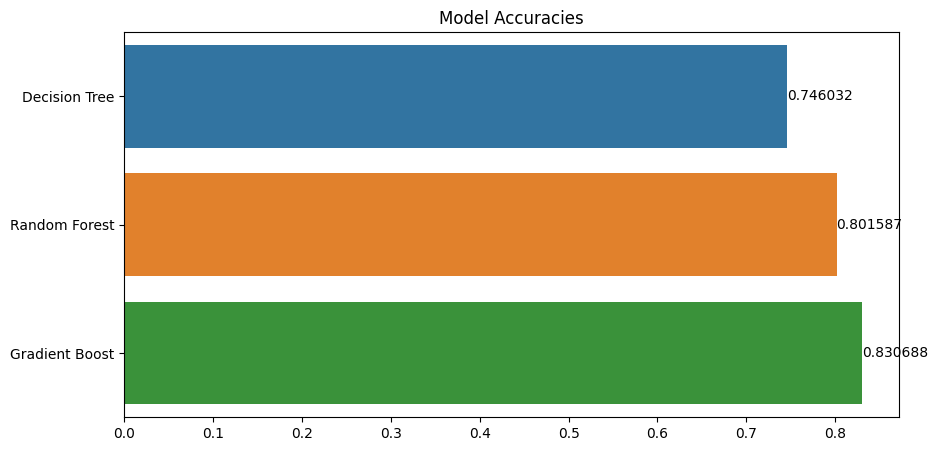

In [ ]:
plt.figure(figsize=(10,5))
plot = sb.barplot(x=[acc_DT, acc_RF, acc_GB], y=["Decision Tree","Random Forest","Gradient Boost"])
plt.title("Model Accuracies")
for container in plot.containers:
    plot.bar_label(container)